In [1]:
# 경고 메시지를 안 보여주게 설정
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 필요한 모듈 불러오기
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import pi

In [3]:
pi

3.141592653589793

In [4]:
# 데이터 준비하기
df = pd.DataFrame({
    'group': ['A','B','C','D'],
    'var1': [38, 1.5, 30, 4],
    'var2': [29, 10, 9, 34],
    'var3': [8, 39, 23, 24],
    'var4': [7, 31, 33, 14],
    'var5': [28, 15, 32, 14]
})

In [5]:
df

,group,var1,var2,var3,var4,var5
0,A,38.0,29,8,7,28
1,B,1.5,10,39,31,15
2,C,30.0,9,23,33,32
3,D,4.0,34,24,14,14


In [6]:
list(df)

['group', 'var1', 'var2', 'var3', 'var4', 'var5']

In [7]:
# 출력할 데이터 이름 만들기
categories=list(df)[1:]

In [8]:
categories

['var1', 'var2', 'var3', 'var4', 'var5']

In [9]:
# 출력할 항목 갯수
N = len(categories)

In [10]:
N

5

In [11]:
# index 0인 데이터 행
df.loc[0]

group     A
var1     38
var2     29
var3      8
var4      7
var5     28
Name: 0, dtype: object

In [12]:
# 데이터에서 group 명 제거
df.loc[0].drop('group')

var1    38
var2    29
var3     8
var4     7
var5    28
Name: 0, dtype: object

In [13]:
df.loc[0].drop('group').values

array([38.0, 29, 8, 7, 28], dtype=object)

In [14]:
df.loc[0].drop('group').values.flatten()

array([38.0, 29, 8, 7, 28], dtype=object)

In [15]:
list(df.loc[0].drop('group').values)

[38.0, 29, 8, 7, 28]

In [16]:
# 한 인물의 데이터를 가공하기
df.loc[0].drop('group').values.flatten().tolist()

[38.0, 29, 8, 7, 28]

In [17]:
# 출력할 첫번째 인물 데이터
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]

In [18]:
# 왜 끝에 데이터를 한번 더 넣을까??
# 도형을 닫아야 하기 때문에 한바퀴를 만들 수 있는 데이터가 필요하다.
values

[38.0, 29, 8, 7, 28, 38.0]

In [19]:
# 출력할 데이터 각도 만들기
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# 그래프에서 0도는 오른쪽 수평 방향부터 시작됩니다.

In [20]:
angles

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669,
 0.0]

In [21]:
# figure 만들기 도화지 만들기
fig = plt.figure(figsize=(12,6)) 

<Figure size 864x432 with 0 Axes>

In [22]:
# polar 옵션값!!
graph = fig.add_subplot(111, polar=True)

In [23]:
angles[:-1]

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669]

In [24]:
# x축 출력 데이터! 능력치!! 출력하기
graph.tick_params(axis='x', colors='gray', size=8)
graph.set_xticks(angles[:-1])
graph.set_xticklabels(categories)

[Text(0, 0, 'var1'),
 Text(0, 0, 'var2'),
 Text(0, 0, 'var3'),
 Text(0, 0, 'var4'),
 Text(0, 0, 'var5')]

In [25]:
categories

['var1', 'var2', 'var3', 'var4', 'var5']

In [26]:
graph.clear

<bound method _AxesBase.clear of <matplotlib.axes._subplots.PolarAxesSubplot object at 0x1196335f8>>

In [27]:
# y 축
# 레이블이 표시되는 위치
graph.set_rlabel_position(1)

# 출력되는 값
graph.set_ylim(0,40)
graph.tick_params(axis='y', colors='gray', size=7)
graph.set_yticks([10,20,30])
graph.set_yticklabels(["10","20","30"])

[Text(0, 0, '10'), Text(0, 0, '20'), Text(0, 0, '30')]

In [28]:
# 시작 지점 각도 조절하기
graph.set_theta_offset(pi / 2)
graph.set_theta_direction(-1)

In [29]:
# 실제 데이터 뿌리기
graph.plot(angles, values, linewidth=1, linestyle='solid', label='A')

In [30]:
# 영역 내부 채우기
graph.fill(angles, values, 'b', alpha=0.1)

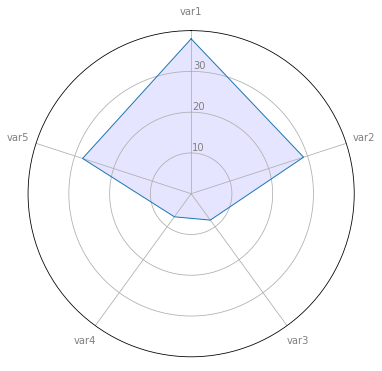

In [31]:
fig

In [32]:
for angle, value, i in zip(angles[:-1], values[:-1], range(N)):
    graph.annotate(value,
            xy=(angle, value+2),
            horizontalalignment='center', verticalalignment='center') # ratation=degree

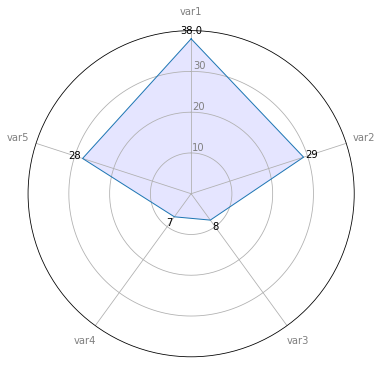

In [33]:
fig

In [34]:
# 컬러셋을 파레트를 이용해서 설정하는 방법
my_palette = plt.cm.get_cmap("Set2", len(df.index)-1)

In [35]:
my_palette

In [36]:
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
graph.plot(angles, values, linewidth=1, linestyle='solid', label='B')
graph.fill(angles, values, my_palette(1), alpha=0.1)

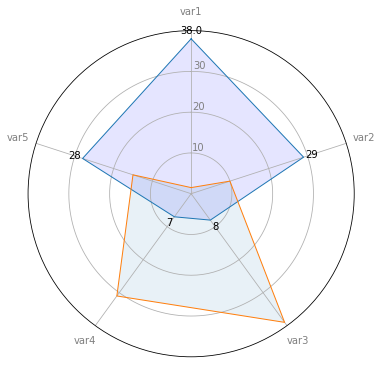

In [37]:
fig

In [38]:
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
graph.plot(angles, values, linewidth=1, linestyle='solid', label='C')
graph.fill(angles, values, my_palette(2), alpha=0.1)

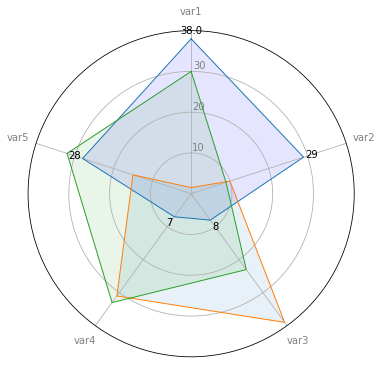

In [39]:
fig

In [40]:
values=df.loc[3].drop('group').values.flatten().tolist()
values += values[:1]
graph.plot(angles, values, linewidth=1, linestyle='solid', label='D')
graph.fill(angles, values, my_palette(3), alpha=0.1)

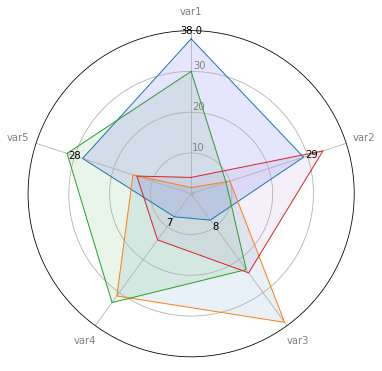

In [41]:
fig

In [42]:
fig.legend(bbox_to_anchor=(0.2,0.2))

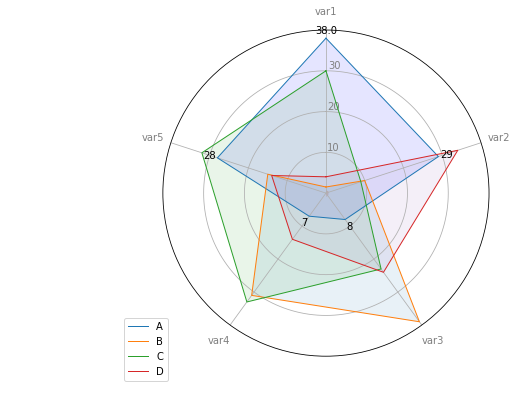

In [43]:
fig

In [44]:
df.loc[0]['group']

'A'

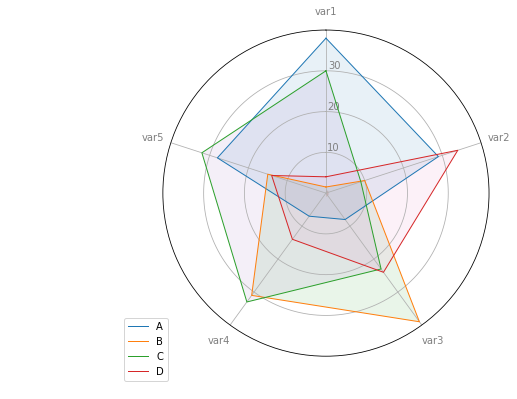

In [45]:
# figure 만들기 도화지 만들기
fig = plt.figure(figsize=(12,6)) 
# polar 옵션값!!
graph = fig.add_subplot(111, polar=True)
graph.clear()
# x축 출력 데이터! 능력치!! 출력하기
graph.tick_params(axis='x', colors='gray', size=8)
graph.set_xticks(angles[:-1])
graph.set_xticklabels(categories)

# y 축
# 레이블이 표시되는 위치
graph.set_rlabel_position(1)

# 출력되는 값
graph.set_ylim(0,40)
graph.tick_params(axis='y', colors='gray', size=7)
graph.set_yticks([10,20,30])
graph.set_yticklabels(["10","20","30"])

# 시작 지점 각도 조절하기
graph.set_theta_offset(pi / 2)
graph.set_theta_direction(-1)

# 컬러셋을 파레트를 이용해서 설정하는 방법
my_palette = plt.cm.get_cmap("Set2", len(df.index))

for index in df.index:
    # 실제 데이터 뿌리기
    values=df.loc[index].drop('group').values.flatten().tolist()
    values += values[:1]
    graph.plot(angles, values, linewidth=1, linestyle='solid', label=df.loc[index]['group'])
    graph.fill(angles, values, my_palette(index), alpha=0.1)
    
    continue
    for angle, value, i in zip(angles[:-1], values[:-1], range(N)):
        graph.annotate(value,
                xy=(angle, value+2),
                horizontalalignment='center', verticalalignment='center') # ratation=degree

fig.legend(bbox_to_anchor=(0.2,0.2))